In [22]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# 为了显示中文
matplotlib.rcParams["font.sans-serif"] = ["Microsoft YaHei Mono"]
matplotlib.rcParams["axes.unicode_minus"] = False

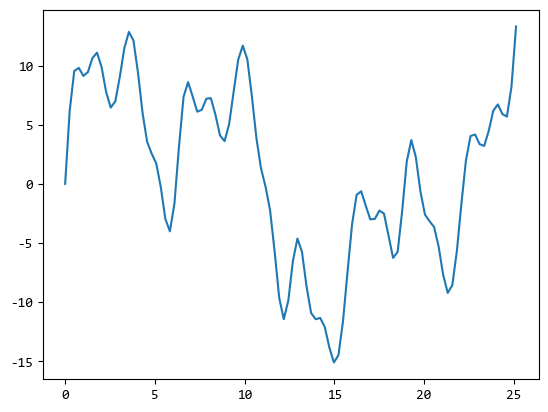

In [23]:
x = np.linspace(0, 8*np.pi, 100)
y1 = np.sin(x)
y2 = 4*np.sin(2*x)
y3 = 2*np.sin(4*x)
y4 = 8*np.sin(0.3*x)
y5 = 6*np.sin(0.8*x)
y6 = 0.5*np.sin(5*x)

y = y1 + y2 + y3 + y4 + y5 + y6

plt.plot(x, y)
plt.show()

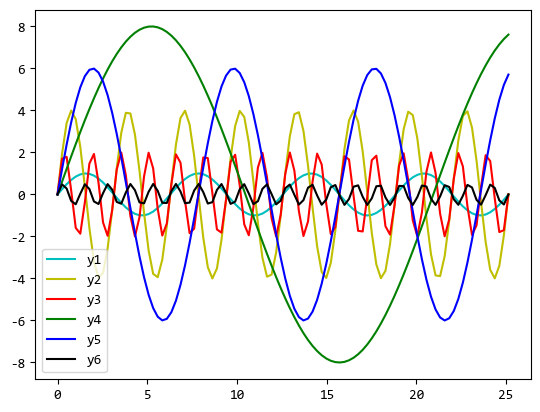

In [24]:
plt.plot(x, y1, color='c', label="y1")
plt.plot(x, y2, color='y', label="y2")
plt.plot(x, y3, color='r', label="y3")
plt.plot(x, y4, color='g', label="y4")
plt.plot(x, y5, color='b', label="y5")
plt.plot(x, y6, color='k', label="y6")

plt.legend()

plt.show()

In [25]:
from scipy import fft as spfft

fft_result = spfft.fft(y)
print(fft_result.shape)
fft_result[0:10]
# fft_result[-10:]

(100,)


array([ 99.548317    -0.j        , 273.43743482-274.69892934j,
       -10.91586207 +66.24943608j, 167.24328363-151.29814008j,
       -57.93543536 +49.80593353j, -30.50244642 +56.21303872j,
       -19.99077861 +37.24642604j, -13.54997057 +21.30562857j,
        35.119202  -161.91923934j, -17.17382544 +41.98143084j])

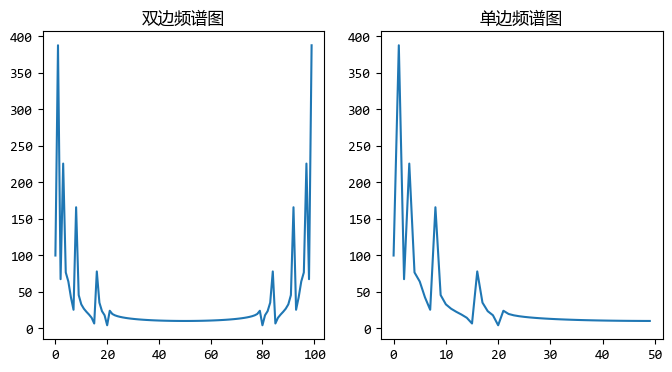

In [42]:
fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
data = np.abs(fft_result)
ax1.plot(data)
ax1.set_title("双边频谱图")

ax2 = fig.add_subplot(122) 
data = np.abs(fft_result[:50])
ax2.plot(data)
ax2.set_title("单边频谱图")

plt.show()

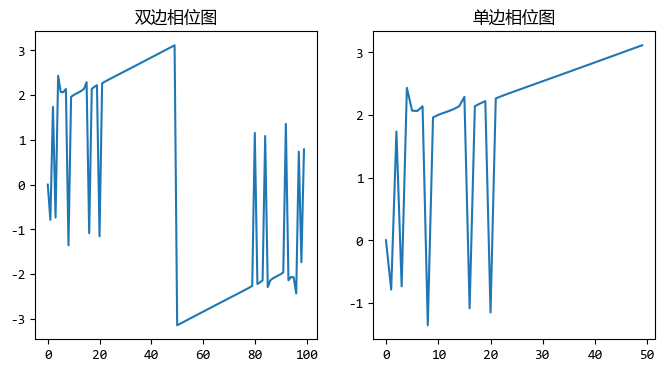

In [43]:
fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
data = np.angle(fft_result)
ax1.plot(data)
ax1.set_title("双边相位图")

ax2 = fig.add_subplot(122) 
data = np.angle(fft_result[:50])
ax2.plot(data)
ax2.set_title("单边相位图")

plt.show()

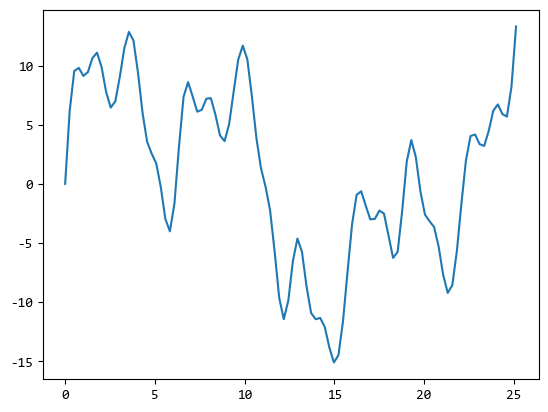

In [52]:
d = spfft.ifft(fft_result)

plt.plot(x, np.real(d))
plt.show()

16000
[122 133 149 151 165 151 160 159 155 151]


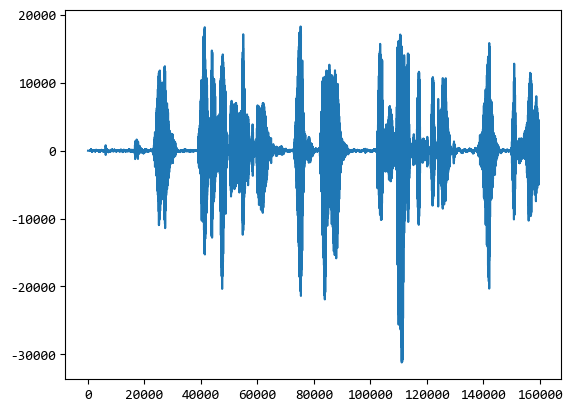

In [4]:
import scipy.io.wavfile as wav

rate, all_samples = wav.read("/home/wangyubin/share/fft-test.wav")
print(rate)
print(all_samples[1000:1010])

plt.plot(all_samples)
plt.show()

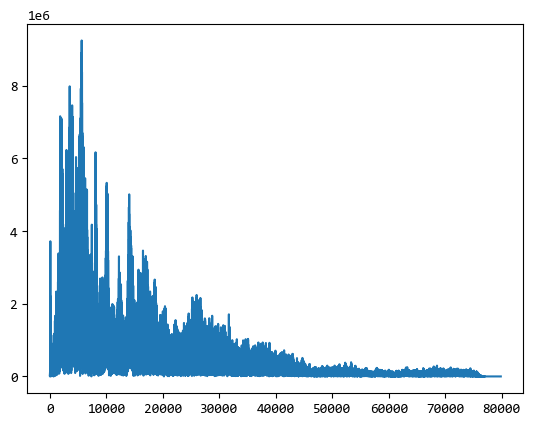

[ -7  10   4  11   5   7  -2 -18 -19   0]
[138 145 126 125 121 132 136 128 127 140]
(159694,) int16
(159695,) int16


In [20]:
i
from scipy import fft as spfft

dd = spfft.rfft(all_samples)
plt.plot(np.abs(dd))
plt.show()
# print(np.abs(dd)[10000:10010])

# new_data = np.array([])
# for idx, val in enumerate(np.abs(dd)):
#     if idx > 20000:
#         new_data = np.append(new_data, 0)
#     else:
#         new_data = np.append(new_data, dd[idx])


new_data = dd
# new_data[20000:] = 0
new_data[:20000] = 0
new_data = spfft.irfft(new_data)
new_data = np.rint(new_data)
new_data = new_data.astype("int16")
print(new_data[1100:1110])
print(all_samples[1100:1110])
print(new_data.shape, new_data.dtype)
print(all_samples.shape, all_samples.dtype)

# for idx, val in enumerate(new_data):
#     if val > all_sa

wav.write("/home/wangyubin/share/aaa.wav", rate, new_data) 


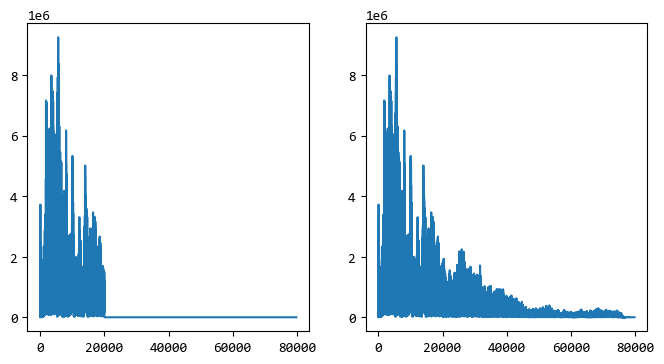

In [30]:
from scipy import fft as spfft

dd = spfft.rfft(all_samples)
new_data = dd.copy()
new_data[20000:] = 0

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
ax1.plot(np.abs(new_data))

ax2 = fig.add_subplot(122) 
ax2.plot(np.abs(dd))

plt.show()

new_data = spfft.irfft(new_data)
new_data = np.rint(new_data)
new_data = new_data.astype("int16")

wav.write("/home/wangyubin/share/fft-test-1.wav", rate, new_data) 

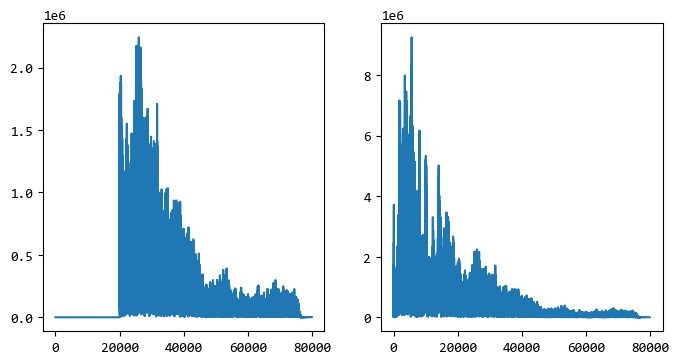

In [31]:
dd = spfft.rfft(all_samples)
new_data = dd.copy()
new_data[:20000] = 0

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
ax1.plot(np.abs(new_data))

ax2 = fig.add_subplot(122) 
ax2.plot(np.abs(dd))

plt.show()

new_data = spfft.irfft(new_data)
new_data = np.rint(new_data)
new_data = new_data.astype("int16")

wav.write("/home/wangyubin/share/fft-test-2.wav", rate, new_data) 